In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
import re
from random import randint
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikhil_Chamle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('C:/Users/Nikhil_Chamle/Desktop/P1/Sentiment analysis_stock_market_index_reviews DJ/Stock Headlines.csv', encoding = 'ISO-8859-1')

In [3]:
df = data.copy()

In [4]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [5]:
df.shape

(4101, 27)

In [6]:
df.head(7)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft
5,2000-01-10,1,Fifth round draw,BBC unveils secret weapon in ratings war: Sout...,Second Division round-up,European round-up,Third Division round-up,Welfare could claim Killie tie as Caley Thistl...,Ferguson puts brave face on Rio meltdown,Southgate in striking form to pre-empt penalties,...,Time Warner and AOL to merge,Keep up,Waging global war,"Desktop icons, No 1: The Qwerty keyboard",The sec's files,The low down: Workplace bullying,Met 'not equipped' to solve murders,Tranmere tie will not be replayed,Rebel attacks take toll on Russia,Met lent stopped car to Lawrence
6,2000-01-11,1,Man Utd 2 - 0 South Melbourne,How North Atlantic drift could carry away Old ...,Buoyant BBC to show Brazil final live,Tranmere given all-clear in the Cup,United sit poorly with the Doc,Queen's Park peril clouds Hampden future,Waugh hits out at Shoaib reprieve,Knight makes case for Butcher's place,...,I'd like that in writing,Split vote may offer 

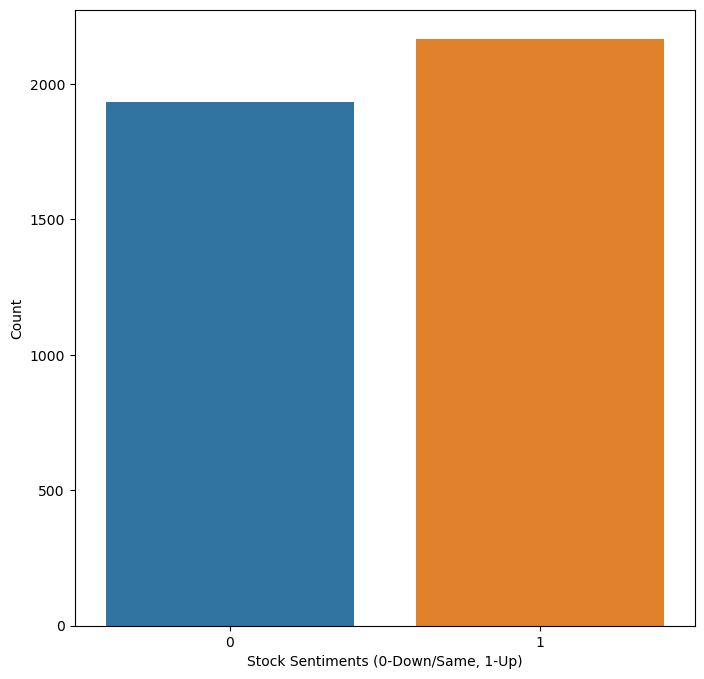

In [7]:
# Visualizing the count of 'Label' column from the dataset
plt.figure(figsize=(8,8))
sns.countplot(x='Label', data=df)
plt.xlabel('Stock Sentiments (0-Down/Same, 1-Up)')
plt.ylabel('Count')
plt.show()

In [8]:
# Finding any NaN values
df.isna().any()

Date     False
Label    False
Top1     False
Top2     False
Top3     False
Top4     False
Top5     False
Top6     False
Top7     False
Top8     False
Top9     False
Top10    False
Top11    False
Top12    False
Top13    False
Top14    False
Top15    False
Top16    False
Top17    False
Top18    False
Top19    False
Top20    False
Top21    False
Top22    False
Top23     True
Top24     True
Top25     True
dtype: bool

In [9]:
# Dropping NaN values
df.dropna(inplace=True)
print(df.shape)

(4098, 27)


In [10]:
df_copy = df.copy()

In [11]:
df_copy.reset_index(inplace=True)

In [12]:
# Splitting the dataset into train an test set
train = df_copy[df_copy['Date'] < '20150101']
test = df_copy[df_copy['Date'] > '20141231']
print('Train size: {}, Test size: {}'.format(train.shape, test.shape))

Train size: (3972, 28), Test size: (378, 28)


In [13]:
# Splitting the dataset
y_train = train['Label']
train = train.iloc[:, 3:28]
y_test = test['Label']
test = test.iloc[:, 3:28]

In [14]:
# Removing punctuation and special character from the text
train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

In [15]:
# Renaming columns
new_columns = [str(i) for i in range(0,25)]
train.columns = new_columns
test.columns = new_columns

In [16]:
# Converting the entire text to lower case
for i in new_columns:
    train[i] = train[i].str.lower()
    test[i] = test[i].str.lower()

In [17]:
# Joining all the columns
train_headlines = []
test_headlines = []

for row in range(0, train.shape[0]):
    train_headlines.append(' '.join(str(x) for x in train.iloc[row, 0:25]))

for row in range(0, test.shape[0]):
    test_headlines.append(' '.join(str(x) for x in test.iloc[row, 0:25]))

In [18]:
# Creating corpus of train dataset
ps = PorterStemmer()
train_corpus = []

for i in range(0, len(train_headlines)):
  
      # Tokenizing the news-title by words
      words = train_headlines[i].split()

      # Removing the stopwords
      words = [word for word in words if word not in set(stopwords.words('english'))]

      # Stemming the words
      words = [ps.stem(word) for word in words]

      # Joining the stemmed words
      headline = ' '.join(words)

      # Building a corpus of news-title
      train_corpus.append(headline)

In [19]:
# Creating corpus of test dataset
test_corpus = []

for i in range(0, len(test_headlines)):
  
      # Tokenizing the news-title by words
      words = test_headlines[i].split()

      # Removing the stopwords
      words = [word for word in words if word not in set(stopwords.words('english'))]

      # Stemming the words
      words = [ps.stem(word) for word in words]

      # Joining the stemmed words
      headline = ' '.join(words)

      # Building a corpus of news-title
      test_corpus.append(headline)

In [20]:
down_words = []
for i in list(y_train[y_train==0].index):
  down_words.append(train_corpus[i])

up_words = []
for i in list(y_train[y_train==1].index):
  up_words.append(train_corpus[i])

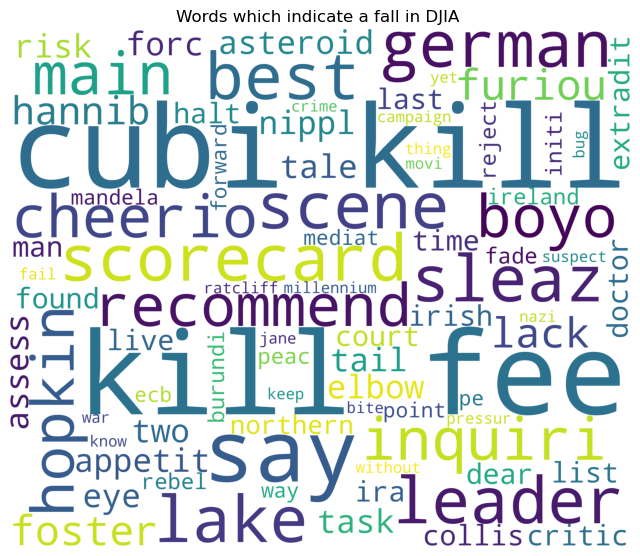

In [21]:
# Creating wordcloud for down_words
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall in DJIA ")
plt.show()

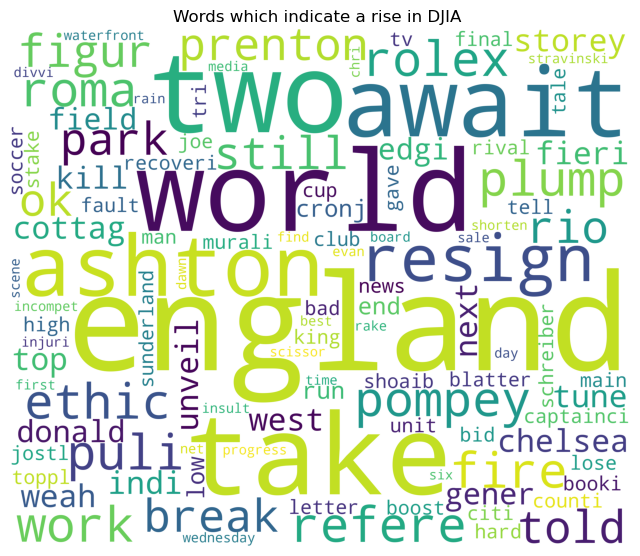

In [22]:
# Creating wordcloud for up_words
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[5])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate a rise in DJIA ")
plt.show()

In [23]:
# Creating the Bag of Words model

cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()

In [24]:
X_test = cv.transform(test_corpus).toarray()

In [25]:
# Logistic regression

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [26]:
lr_y_pred = lr_classifier.predict(X_test)

In [27]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 85.98%
Precision score is: 0.87
Recall score is: 0.85


In [28]:
lr_cm = confusion_matrix(y_test, lr_y_pred)
lr_cm

array([[162,  24],
       [ 29, 163]], dtype=int64)

In [29]:
# Random Forest

rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [30]:
rf_y_pred = rf_classifier.predict(X_test)

In [32]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm

array([[147,  39],
       [ 27, 165]], dtype=int64)

In [33]:
# Prediction

def stock_prediction(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return lr_classifier.predict(temp)

In [34]:
sample_test = df_copy[df_copy['Date'] > '20141231']

In [35]:
sample_test.reset_index(inplace=True)
sample_test = sample_test['Top1']

In [36]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: The White House on Monday sharply rebuked nearly four dozen Republican senators who sent a letter to Iranian leaders just as nuclear negotiations reach a pivotal moment, characterizing the correspondence as an illegitimate interference in President Obamas foreign policy.
Prediction: The stock price will go up!
